# Player evaluation

Here we compare players based on their adjusted points. Also, we calculate some useful metrics using the adjusted points to further evaluate player performance in FPL.

In [1]:
# recent gameweek
gameweek = 38

In [2]:
# import basic libraries
import pandas as pd
import numpy as np
import requests
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

pd.set_option('max_columns',100)

In [3]:
# fetch FPL data
filepath = '../data/fpl/data_week' + str(gameweek) + '.csv'
df = pd.read_csv(filepath, index_col=0)

# fetch team data
filepath = '../data/fbref/team_stats_week' + str(gameweek) + '.csv'
teamStats = pd.read_csv(filepath, index_col=0)

# fetch player stats data
filepath = '../data/fbref/player_stats_week' + str(gameweek) + '.csv'
playerStats = pd.read_csv(filepath, index_col=0, skiprows=1)

## Value and value points

Here we calculate two interesting metrics: 'value' and 'value points'. 

Value is simply adjusted points per game divided by the cost of the player. Essentially, this measures how many 'points per pound(/euro/whatever)' has the player gained on an average game week. 

The value points is calculated as the geometric mean of a players adjusted points per game and value. Essentially, in FPL we want to gain the maximum possible amount of points. However, we are restrained by a limited budget, so that in practice we cannot just pick all the best players. Then, we would like to have a squad of players that give the most points given our budget. Thus, we would like to pick players that have high value ('bang for buck'). However, often the players with highest value are very cheap players who somewhat overperform relative to their price. Picking a squad full of these players might leave a part of our budget unused. Calculating the geometric mean of adjusted points and value allows us to weigh both aspects equally, i.e. we want players that both gain a lot of points but also have good value. For example, this metric values equally two players, where one has twice the points per game of the other who in turn has twice the value of the other.

In [4]:
# value = expected points / cost
df['value'] = df['adjusted points per game'] / (df['now_cost'] / 10.0)
df['value form 5'] = df['form 5'] / (df['now_cost'] / 10.0)
df['value form 10'] = df['form 10'] / (df['now_cost'] / 10.0)
# geometric mean of 'adjusted points per game' and 'value'
df['valuePoints metric'] = np.sqrt(df['adjusted points per game'] * df['value'])

In [5]:
df['value_next10']  = df['xPoints_next10'] / (df['now_cost'] / 10.0)

In [6]:
df['xG+xA'] = df['xG'] + df['xA']
df['xG+xA per game'] = df['xG+xA'] / df['games played']

In [7]:
goalkeepers = df['element_type'] == 1
defenders = df['element_type'] == 2
midfielders = df['element_type'] == 3
forwards = df['element_type'] == 4

minGames = df['games played'] >= 3

## Player evaluation

Below we compile lists for each position sorting players based on a given metric.

Notice that 'next1_xP' is currently based on preseason expectations on average player performance!

In [8]:
metric = 'valuePoints metric'
#metric = 'adjusted points per game'
#metric = 'next1_xP'

numberToShow = 40

print('GOALKEEPERS')
display(df[goalkeepers & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'xPoints_next10', 'valuePoints metric']].head(20))
print('DEFENDERS')
display(df[defenders & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'xPoints_next10','valuePoints metric']].head(numberToShow))
print('MIDFIELDERS')
display(df[midfielders & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'xPoints_next10','valuePoints metric']].head(numberToShow))
print('FORWARDS')
display(df[forwards & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'xPoints_next10','valuePoints metric']].head(numberToShow))

GOALKEEPERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,xPoints_next10,valuePoints metric
id,,,,,,,,,,,
129,Arrizabalaga,Chelsea,45,4.0,19,17.204162,4.8,4.301040,NaN,0.0,2.027530
156,Butland,Crystal Palace,44,9.0,30,38.238315,3.3,4.248702,5.043659,0.0,2.025489
481,Begović,Everton,40,3.0,13,11.859641,4.3,3.953214,1.199148,0.0,1.976607
146,Guaita,Crystal Palace,46,30.0,119,115.794382,4.0,3.859813,5.996280,0.0,1.799647
80,Raya,Brentford,44,24.0,95,89.370420,4.0,3.723768,3.329757,0.0,1.775237
448,Gunn,Norwich City,40,9.0,31,31.745530,3.4,3.527281,3.320535,0.0,1.763641
231,Alisson,Liverpool,61,36.0,176,153.517031,4.9,4.264362,5.715910,0.0,1.726590
408,Fabianski,West Ham,50,37.0,136,142.671659,3.7,3.855991,5.998357,0.0,1.724452
353,Lloris,Tottenham,55,38.0,158,149.395038,4.2,3.931448,4.539227,0.0,1.676375


DEFENDERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,xPoints_next10,valuePoints metric
id,,,,,,,,,,,
135,Chilwell,Chelsea,56,7.0,55,39.528283,7.9,5.646898,1.000000,0.0,2.386250
360,Doherty,Tottenham,45,15.0,67,73.529357,4.5,4.901957,NaN,0.0,2.310805
237,Alexander-Arnold,Liverpool,84,32.0,208,199.092916,6.5,6.221654,5.780284,0.0,2.146674
245,Tsimikas,Liverpool,37,13.0,42,53.483622,3.2,4.114125,5.381281,0.0,2.138832
256,Cancelo,Manchester City,72,36.0,201,204.769073,5.6,5.688030,5.706887,0.0,2.119804
224,Matip,Liverpool,53,31.0,170,149.927638,5.5,4.836375,8.030110,0.0,2.100787
142,James,Chelsea,65,26.0,141,135.966051,5.4,5.229463,7.229797,0.0,2.051164
370,Reguilón,Tottenham,50,25.0,104,112.541262,4.2,4.501650,NaN,0.0,2.013199
122,Alonso,Chelsea,57,28.0,128,133.884132,4.6,4.781576,6.958867,0.0,2.002782


MIDFIELDERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,xPoints_next10,valuePoints metric
id,,,,,,,,,,,
268,Torres,Manchester City,67,4.0,26,25.226224,6.5,6.306556,NaN,0.0,2.436435
233,Salah,Liverpool,131,35.0,265,253.343938,7.6,7.238398,5.122083,0.0,1.999893
420,Bowen,West Ham,69,36.0,206,182.113620,5.7,5.058712,4.460027,0.0,1.925819
359,Son,Tottenham,112,35.0,258,221.420042,7.4,6.326287,8.793207,0.0,1.890340
265,Foden,Manchester City,79,28.0,137,144.612570,4.9,5.164735,6.695349,0.0,1.837530
240,Jota,Liverpool,83,35.0,175,181.626938,5.0,5.189341,4.873802,0.0,1.801247
96,Mbeumo,Brentford,52,35.0,119,142.831216,3.4,4.080892,3.792439,0.0,1.789589
196,Raphinha,Leeds United,63,35.0,145,156.096342,4.1,4.459895,4.698958,0.0,1.776865
250,Gündogan,Manchester City,71,27.0,124,127.652764,4.6,4.727880,5.118432,0.0,1.774342


FORWARDS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,xPoints_next10,valuePoints metric
id,,,,,,,,,,,
78,Toney,Brentford,69,33.0,139,142.855,4.2,4.328939,3.594200,0.0,1.647999
315,Pukki,Norwich City,61,37.0,142,144.273,3.8,3.899270,5.040000,0.0,1.578768
357,Kane,Tottenham,125,37.0,192,204.961,5.2,5.539486,8.154200,0.0,1.566803
263,Jesus,Manchester City,86,28.0,120,126.288,4.3,4.510286,6.594200,0.0,1.537995
177,Calvert-Lewin,Everton,77,17.0,64,70.702,3.8,4.158941,6.190333,0.0,1.498778
450,Dennis,Watford,58,33.0,134,117.997,4.1,3.575667,3.523667,0.0,1.484715
579,Ronaldo,Manchester Utd,122,30.0,159,154.173,5.3,5.139100,6.766667,0.0,1.471320
296,Wilson,Newcastle Utd,71,18.0,75,69.840,4.2,3.880000,5.666667,0.0,1.456138
413,Antonio,West Ham,73,36.0,140,141.430,3.9,3.928611,3.367750,0.0,1.454044


Below we compile a list sorting players based on a given metric (irrespective of position).

In [9]:
metric = 'adjusted points per game'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game','xPoints_next10',\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,xPoints_next10,valuePoints metric
id,,,,,,,,,,
233,Salah,Liverpool,131,35.0,265,253.343938,7.6,7.238398,0.0,1.999893
690,Kenedy,Chelsea,45,1.0,4,6.622040,4.0,6.622040,0.0,3.121660
359,Son,Tottenham,112,35.0,258,221.420042,7.4,6.326287,0.0,1.890340
268,Torres,Manchester City,67,4.0,26,25.226224,6.5,6.306556,0.0,2.436435
237,Alexander-Arnold,Liverpool,84,32.0,208,199.092916,6.5,6.221654,0.0,2.146674
253,Mendy,Manchester City,52,1.0,3,5.855224,3.0,5.855224,0.0,2.567686
256,Cancelo,Manchester City,72,36.0,201,204.769073,5.6,5.688030,0.0,2.119804
135,Chilwell,Chelsea,56,7.0,55,39.528283,7.9,5.646898,0.0,2.386250
255,Sterling,Manchester City,105,30.0,163,168.421182,5.4,5.614039,0.0,1.732530


In [10]:
metric = 'valuePoints metric'

display(df[minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','xPoints_next10',\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,xPoints_next10,valuePoints metric
id,,,,,,,,,
268,Torres,Manchester City,67,4.0,6.5,6.306556,NaN,0.0,2.436435
135,Chilwell,Chelsea,56,7.0,7.9,5.646898,1.000000,0.0,2.386250
360,Doherty,Tottenham,45,15.0,4.5,4.901957,NaN,0.0,2.310805
237,Alexander-Arnold,Liverpool,84,32.0,6.5,6.221654,5.780284,0.0,2.146674
245,Tsimikas,Liverpool,37,13.0,3.2,4.114125,5.381281,0.0,2.138832
256,Cancelo,Manchester City,72,36.0,5.6,5.688030,5.706887,0.0,2.119804
224,Matip,Liverpool,53,31.0,5.5,4.836375,8.030110,0.0,2.100787
142,James,Chelsea,65,26.0,5.4,5.229463,7.229797,0.0,2.051164
129,Arrizabalaga,Chelsea,45,4.0,4.8,4.301040,NaN,0.0,2.027530


In [11]:
metric = 'adjusted points per game'

display(df[minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 10',\
                                                        'xPoints_next10','valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 10,xPoints_next10,valuePoints metric
id,,,,,,,,,,,
233,Salah,Liverpool,131,35.0,265,253.343938,7.6,7.238398,6.735067,0.0,1.999893
359,Son,Tottenham,112,35.0,258,221.420042,7.4,6.326287,8.487269,0.0,1.890340
268,Torres,Manchester City,67,4.0,26,25.226224,6.5,6.306556,NaN,0.0,2.436435
237,Alexander-Arnold,Liverpool,84,32.0,208,199.092916,6.5,6.221654,5.764425,0.0,2.146674
256,Cancelo,Manchester City,72,36.0,201,204.769073,5.6,5.688030,6.030326,0.0,2.119804
135,Chilwell,Chelsea,56,7.0,55,39.528283,7.9,5.646898,1.000000,0.0,2.386250
255,Sterling,Manchester City,105,30.0,163,168.421182,5.4,5.614039,8.433661,0.0,1.732530
357,Kane,Tottenham,125,37.0,192,204.961000,5.2,5.539486,8.046800,0.0,1.566803
251,De Bruyne,Manchester City,121,30.0,196,165.332182,6.5,5.511073,7.295282,0.0,1.584322


In [12]:
metric = f'gameweek {gameweek+1} prediction'
#metric = 'xPoints_next10'

display(df[(defenders) & (df['now_cost']<55)].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game',metric,\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,gameweek 39 prediction,valuePoints metric
id,,,,,,,,,,
5,Cédric,Arsenal,42,21.0,48,59.292072,2.3,2.823432,0.0,1.377694
331,Omobamidele,Norwich City,39,5.0,14,12.436406,2.8,2.487281,0.0,1.259484
302,Manquillo,Newcastle Utd,39,19.0,38,42.900154,2.0,2.257903,0.0,1.143334
303,Krafth,Newcastle Utd,43,20.0,58,53.989057,2.9,2.699453,0.0,1.301792
305,Schär,Newcastle Utd,41,25.0,88,80.414571,3.5,3.216583,0.0,1.588557
311,Lewis,Newcastle Utd,42,5.0,10,10.654514,2.0,2.130903,0.0,1.039774
465,Fernández,Newcastle Utd,43,7.0,11,18.587320,1.6,2.655331,0.0,1.280515
678,Trippier,Newcastle Utd,49,6.0,28,19.385417,4.7,3.230903,0.0,1.459573
290,Williams,Norwich City,39,26.0,36,44.580309,1.4,1.714627,0.0,0.868235


In [13]:
metric = 'xG'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game',\
                      'valuePoints metric', 'xG', 'xA', 'xG+xA', 'xG+xA per game']].head(numberToShow))

,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,valuePoints metric,xG,xA,xG+xA,xG+xA per game
id,,,,,,,,,,,
233,Salah,Liverpool,131,35.0,7.6,7.238398,1.999893,21.8,10.4,32.2,0.920000
357,Kane,Tottenham,125,37.0,5.2,5.539486,1.566803,20.1,9.0,29.1,0.786486
230,Mané,Liverpool,118,34.0,5.4,5.452305,1.587227,16.7,4.4,21.1,0.620588
579,Ronaldo,Manchester Utd,122,30.0,5.3,5.139100,1.471320,16.5,3.1,19.6,0.653333
359,Son,Tottenham,112,35.0,7.4,6.326287,1.890340,16.4,8.1,24.5,0.700000
240,Jota,Liverpool,83,35.0,5.0,5.189341,1.801247,16.1,5.5,21.6,0.617143
255,Sterling,Manchester City,105,30.0,5.4,5.614039,1.732530,14.4,4.6,19.0,0.633333
40,Watkins,Aston Villa,75,35.0,3.7,3.923800,1.432769,12.2,2.9,15.1,0.431429
78,Toney,Brentford,69,33.0,4.2,4.328939,1.647999,12.0,5.8,17.8,0.539394


## Player Visualizations

In [14]:
game_weeks = np.arange(1,gameweek+1)
column_xPoints = []
column_xG = []
column_xA = []
column_xGA = []
for i in range(1,gameweek+1):
    column_xPoints.append('xPoints week ' + str(i))
    column_xG.append('xG_week' + str(i))
    column_xA.append('xA_week' + str(i))
    column_xGA.append('xGA_week' + str(i))

#display(game_weeks)
#display(column_xPoints)

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,gameweek 39 prediction,xPoints_next10,valuePoints metric
id,,,,,,,,,,,
368,Sessegnon,Tottenham,44,15.0,56,57.687357,3.7,3.845824,0.0,0.0,1.833425


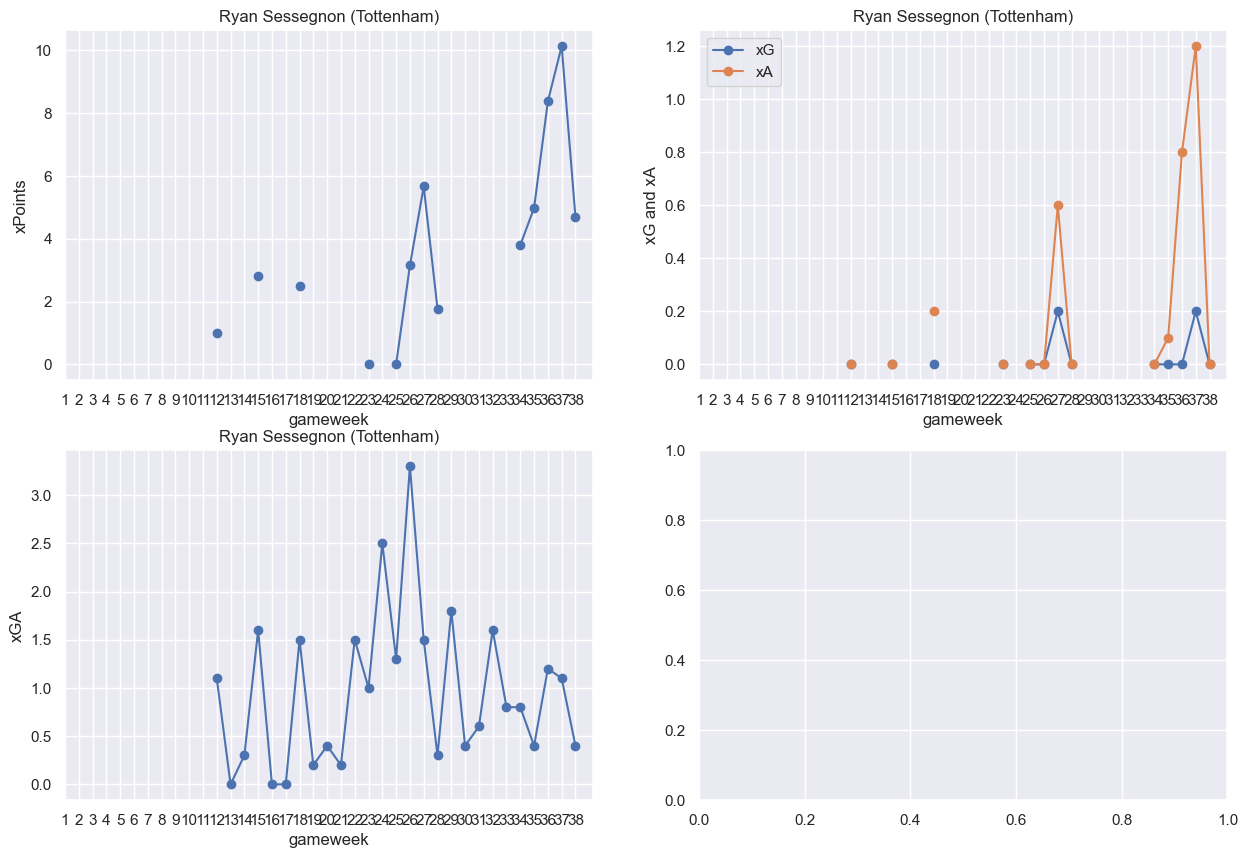

In [15]:
# find player index
name_string = 'Sesseg'
playersFound = df[df['web_name'].str.contains(name_string)]
display(playersFound[['web_name','team_name','now_cost','games played','total_points','adjusted points',\
                      'points_per_game','adjusted points per game',f'gameweek {gameweek+1} prediction',\
                      'xPoints_next10', 'valuePoints metric']])
# plot xPoints over time
ix = playersFound.index[0]
#ix = 266

fig,ax = plt.subplots(2,2,figsize=(15,10))

ax[0,0].plot(game_weeks, df.loc[ix,column_xPoints], marker='o')
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[0,0].set_title(title_string)
ax[0,0].set_xlabel('gameweek')
ax[0,0].set_ylabel('xPoints')
ax[0,0].set_xticks(game_weeks)

ax[0,1].plot(game_weeks, df.loc[ix,column_xG], marker='o')
ax[0,1].plot(game_weeks, df.loc[ix,column_xA], marker='o')
ax[0,1].legend(('xG','xA'))
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[0,1].set_title(title_string)
ax[0,1].set_xlabel('gameweek')
ax[0,1].set_ylabel('xG and xA')
ax[0,1].set_xticks(game_weeks)

ax[1,0].plot(game_weeks, df.loc[ix,column_xGA], marker='o')
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[1,0].set_title(title_string)
ax[1,0].set_xlabel('gameweek')
ax[1,0].set_ylabel('xGA')
ax[1,0].set_xticks(game_weeks)

plt.show()

## My team

In [16]:
session = requests.session()

In [17]:
filepath = Path('../../../access_control/FPL_access.txt')
with open(filepath) as file:
    text = file.read().splitlines()
    email = text[0]
    password = text[1]

In [18]:
url = 'https://users.premierleague.com/accounts/login/'

payload = {
'password': password,
'login': email,
'redirect_uri': 'https://fantasy.premierleague.com/a/login', 
#"redirect_uri": "https://fantasy.premierleague.com/",
#'redirect_uri': 'https://fantasy.premierleague.com/api/bootstrap-static/',
'app': 'plfpl-web'
}

headers = {
   'authority': 'users.premierleague.com' ,
   'cache-control': 'max-age=0' ,
   'upgrade-insecure-requests': '1' ,
   'origin': 'https://fantasy.premierleague.com' ,
   'content-type': 'application/x-www-form-urlencoded' ,
   'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.116 Safari/537.36' ,
   'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9' ,
   'sec-fetch-site': 'same-site' ,
   'sec-fetch-mode': 'navigate' ,
   'sec-fetch-user': '?1' ,
   'sec-fetch-dest': 'document' ,
   'referer': 'https://fantasy.premierleague.com/my-team' ,
   'accept-language': 'en-US,en;q=0.9,he;q=0.8' ,
}

session.post(url, data=payload, headers=headers)

<Response [200]>

In [19]:
response = session.get('https://fantasy.premierleague.com/api/my-team/3202682')
team = response.json()['picks']

In [20]:
my_player_ix = [player['element'] for player in team]
my_starting11 = my_player_ix[:-4]
my_subs = my_player_ix[-4:]

In [21]:
exp_avg = df.loc[my_starting11,'adjusted points per game'].sum() + \
                df.loc[my_starting11,'adjusted points per game'].max()
exp_next = df.loc[my_starting11, f'gameweek {gameweek+1} prediction'].sum() + \
                df.loc[my_starting11,f'gameweek {gameweek+1} prediction'].max()

print('STARTING 11')
print('Expected points on average: ' + str(exp_avg))
print('Predicted points next gameweek: ' + str(exp_next))
display(df.loc[my_starting11, ['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','form 10', \
           f'gameweek {gameweek+1} prediction','xPoints_next10', 'valuePoints metric']].head(numberToShow))
print('\nSUBSTITUTES')
display(df.loc[my_subs, ['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','form 10', \
         f'gameweek {gameweek+1} prediction', 'xPoints_next10', 'valuePoints metric']].head(numberToShow))

STARTING 11
Expected points on average: 60.764448392398975
Predicted points next gameweek: 0.0


,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,form 10,gameweek 39 prediction,xPoints_next10,valuePoints metric
id,,,,,,,,,,,
200,Schmeichel,Leicester City,50,37.0,3.5,3.587131,4.192428,4.682466,0.0,0.0,1.604214
237,Alexander-Arnold,Liverpool,84,32.0,6.5,6.221654,5.780284,5.764425,0.0,0.0,2.146674
256,Cancelo,Manchester City,72,36.0,5.6,5.688030,5.706887,6.030326,0.0,0.0,2.119804
122,Alonso,Chelsea,57,28.0,4.6,4.781576,6.958867,5.927133,0.0,0.0,2.002782
142,James,Chelsea,65,26.0,5.4,5.229463,7.229797,4.684666,0.0,0.0,2.051164
368,Sessegnon,Tottenham,44,15.0,3.7,3.845824,6.393427,6.393427,0.0,0.0,1.833425
22,Saka,Arsenal,67,38.0,4.7,4.478458,5.335415,6.417757,0.0,0.0,1.730179
359,Son,Tottenham,112,35.0,7.4,6.326287,8.793207,8.487269,0.0,0.0,1.890340
138,Mount,Chelsea,77,32.0,5.3,4.844041,6.018790,5.379414,0.0,0.0,1.745671



SUBSTITUTES


,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,form 10,gameweek 39 prediction,xPoints_next10,valuePoints metric
id,,,,,,,,,,,
376,Foster,Watford,42,26.0,3.1,3.130615,3.674900,3.236589,0.0,0.0,1.527584
518,Broja,Southampton,53,32.0,2.9,2.982562,1.800000,2.242857,0.0,0.0,1.295542
700,Weghorst,Burnley,62,20.0,2.8,3.065650,3.694200,3.807889,0.0,0.0,1.231195
503,Gordon,Everton,47,35.0,2.9,2.901532,3.318366,3.703193,0.0,0.0,1.338377


## Save data

In [22]:
# save data
filepath = '../data/fpl/data_week' + str(gameweek) + str('.csv')
df.to_csv(filepath)